#### 6.1 决策树

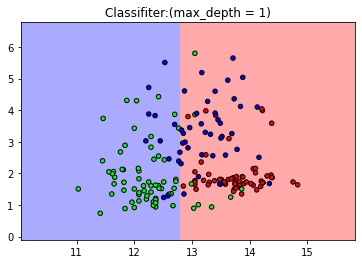

In [2]:
#### 决策树的构建
# 导入numpy
import numpy as np
# 导入画图工具
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# 导入tree模型和数据集加载工具
from sklearn import tree, datasets
# 导入数据拆分工具
from sklearn.model_selection import train_test_split
wine = datasets.load_wine()
# 只选取数据集的前两个特征
x = wine.data[:,:2]
y = wine.target
# 将数据集拆分为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x,y)
# 设定决策树最大深度为1
clf2 = tree.DecisionTreeClassifier(max_depth=1)
# 重新拟合数据
clf2.fit(x_train, y_train)
# 定义图像中分区的颜色和散点颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# 分别用样本的两个特征值，创建图像和横纵坐标
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     (np.arange(y_min, y_max, .02)))
z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])

# 给每个分类中的样本分配不同的颜色
z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, z, cmap=cmap_light)

# 用散点图把样本表示粗来
plt.scatter(x[:,0],x[:,1],c=y,cmap=cmap_bold, edgecolors='k', s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifiter:(max_depth = 1)")
plt.show()


【结果分析】
- 从结果看到，显然最大深度等于1时，分类器的表现肯定不会太好。
- 分类器只分了2类，我们需要加大深度试试看结果变化
  

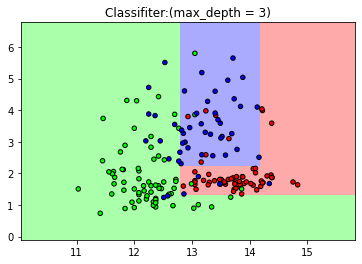

In [3]:
# 设定决策树最大深度为3
clf2 = tree.DecisionTreeClassifier(max_depth=3)
# 重新拟合数据
clf2.fit(x_train, y_train)
# 分别用样本的两个特征值，创建图像和横纵坐标
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     (np.arange(y_min, y_max, .02)))
z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])

# 给每个分类中的样本分配不同的颜色
z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, z, cmap=cmap_light)

# 用散点图把样本表示粗来
plt.scatter(x[:,0],x[:,1],c=y,cmap=cmap_bold, edgecolors='k', s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifiter:(max_depth = 3)")
plt.show()

【结果分析】
- 上图可看到，当决策树最大深度设为3时， 分类器能够进行3个分类
- 而且大部分数据点都进入了正确的分类
- 接下来进一步调整max_dapth的值，看看会有什么变化
  

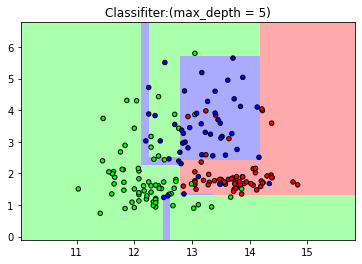

In [4]:
# 设定决策树最大深度为5
clf3 = tree.DecisionTreeClassifier(max_depth=5)
# 重新拟合数据
clf3.fit(x_train, y_train)
# 定义图像中分区颜色和散点颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# 分别用样本的两个特征值，创建图像和横纵坐标
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     (np.arange(y_min, y_max, .02)))
z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])

# 给每个分类中的样本分配不同的颜色
z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, z, cmap=cmap_light)

# 用散点图把样本表示粗来
plt.scatter(x[:,0],x[:,1],c=y,cmap=cmap_bold, edgecolors='k', s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifiter:(max_depth = 5)")
plt.show()

【结果分析】
- 可以看到分类器进一步提升了
- 如果好奇决策树到底做了哪些事情呢，可以下载graphviz的库来展示下这个过程
- pip install graphviz

In [17]:
# 导入工具
import graphviz
# 导入决策树中输出graphviz的接口
from sklearn.tree import export_graphviz
# 选择最大深度为3的分类 模型
export_graphviz(clf2, out_file='wine.dot', class_names=wine.target_names,
                feature_names=wine.feature_names[:2], impurity=False, filled=True)
# 打開一个dot文件
with open('wine.dot') as f:
    dot_graph = f.read()
    # 显示dot文件中的图形
    graphviz.Source(dot_graph)

##### 决策树的优势和不足
- 优势
- 很容易将模型进行可视化
- 由于决策树算法对每个样本特征进行单独处理，因此并不需要对数据进行转换，不需要对数据预处理
- 不足
- 不可避免的会出现过拟合问题
- 让模型的泛化性能大打折扣- 为了避免过拟合问题，可以使用集合学习的方法，也就是————随机森林算法

#### 随机森林
- 原理：
- 随机树会出现过拟合问题；
- 但我们可以让很多树组成团队来工作
- 也就是——随机森林

##### 基本概念
- 随机森林有时也会被称为随机决策森林；
- 是一种集合学习方法
- 既可用于分类，也可用于回归
- 集合学习算法其实就是把过多的机器学习算法综合在一起，制造出更大模型的意思
- 集合算法中目前应用比较广泛的包括随机森林(Random Forests)、梯度上升决策树（Gradient Boosted Decision Trees， GBDT）
- 为什么随机森林可以解决决策树中过拟合现象呢？
- 因为随机森林是把几颗决策树打包到一起；
- 每颗数的参数都不相同，然后我们把每颗数预测的结果取平均值；
- 这样既可以保留决策树工作成效，又可以降低过拟合风险；
  

##### 随机森林的构建

In [43]:
# 导入随机森林模型
from sklearn.ensemble import RandomForestClassifier
# 载入红酒数据集
wine = datasets.load_wine()
# 选择数据集前两个特征
x = wine.data[:,:2]
y = wine.target
# 将数据集拆分
x_train, x_test, y_train, y_test = train_test_split(x, y)
# 设定随机森林中有6棵树
forest = RandomForestClassifier(n_estimators=7, random_state=7)
# 使用模型拟合数据
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=7, random_state=7)

【结果分析】
- max_feature的取值越高，随机森林里每一颗决策树就会长得更像
- 因为有更多不同的特征可以选择，所有也就会更容易拟合数据
- 反之，如果max_features取值越低，就会迫使每颗决策树的样子更加不同
- 因为特征太少，决策树们不得不制造更多节点来拟合数据
- e_estimators这个参数是随机森林中决策树的数量
- 如果用来进行回归分析的话，随机森林会把所有决策树预测的值取平均数
- 如果用来进行分类的话，在森林内部会进行“投票”，每颗树预测出数据类别的概率；
- 随机森林会把这才概率取平均值，然后放入概率最高的分类中
  

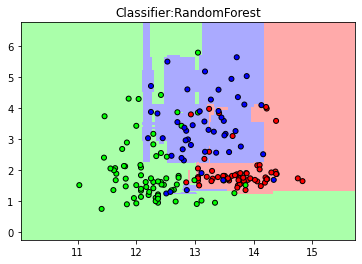

In [44]:
"""用图像直观看下随机森林分类的表现 """

# 定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 分别用样本的两个特征创建图形和横轴和纵轴
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
z = forest.predict(np.c_[xx.ravel(), yy.ravel()])

# 给每个分类中的样本分配不同的颜色
z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, z, cmap=cmap_light)

# 用散点把样本表示出来
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s =25)  # s是散点的直径
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:RandomForest")

plt.show()

#### 随机森林的优势和不足、
**随机森林的优势：**
- 随机森林算法支持并行处理
- 对于超大数据集来说，随机森林比较耗时，不过可以用多进程并行处理的方式，来解决这个问题
- 实现方式是调节随机森林的n_jobs参数。记得把n_jobs参数设定与cpu内核数一致；
- 如果不清楚自己的CPU多少内核， 可以设置为n_jobs = -1 ， 这样随机森林会使用cpu的全部内核，速度就会极大提升
- 因为随机森林生成每颗决策树的方法是随机的，那么不同的random_state参数会导致模型完全不同，所有如果不希望建模结果不太稳定，
- 一定要固化random_state此参数的值。
  
**随机森林的不足：**
- 对于超高维数据集、稀疏数据集，效果不太好
- 这时线性模型要比随机森林的表现更好一些
- 随机森林相对更消耗内存
- 速度比线性模型要慢
  

#### 随机森林实例
**数据集准备：**
- 成人数据集：包括了万条数据样本；
- 特征: 年龄、工作单位性质、统计权重、学历、受教育时长、婚宴状况、职业、家庭情况、种族、性别、资产所得、资产损失、每周工作时长。原籍、收入、等。
- 下载： http://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [82]:
# 导入pandas库
import pandas as pd
# 用pandas打开csv文件
data = pd.read_csv('adult.csv', header=None, index_col=False,
                   names=['年龄', '单位性质', '权重', '学历', '受教育时长', '婚姻状况', '职业', '家庭情况', '种族', '性别', '资产所得', '资产损失', '周工作时长', '原籍', '收入'])
# 为了方便展示，我们选取其中一部分数据
data_lite = data[['年龄', '单位性质', '学历', '性别', '周工作时长', '职业', '收入']]
# 下面看一下数据的前5行是不是我们想要的结果
display(data_lite.head)


<bound method NDFrame.head of        年龄               单位性质           学历       性别  周工作时长                  职业  \
0      39          State-gov    Bachelors     Male     40        Adm-clerical   
1      50   Self-emp-not-inc    Bachelors     Male     13     Exec-managerial   
2      38            Private      HS-grad     Male     40   Handlers-cleaners   
3      53            Private         11th     Male     40   Handlers-cleaners   
4      28            Private    Bachelors   Female     40      Prof-specialty   
...    ..                ...          ...      ...    ...                 ...   
32556  27            Private   Assoc-acdm   Female     38        Tech-support   
32557  40            Private      HS-grad     Male     40   Machine-op-inspct   
32558  58            Private      HS-grad   Female     40        Adm-clerical   
32559  22            Private      HS-grad     Male     20        Adm-clerical   
32560  52       Self-emp-inc      HS-grad   Female     40     Exec-managerial  

##### 用get_dummies处理数据
- 它可以实现在现有的数据集上添加虚拟变量
- 让数据变成可用的格式


In [83]:
# 使用get_dummies将文本数据转化为数值
data_dummies = pd.get_dummies(data_lite)
# 对比样本原始特征和虚拟变量特征
print('样本原始特征：\n', list(data_lite.columns),'\n')
print('虚拟变量特征：\n', list(data_dummies.columns))


样本原始特征：
 ['年龄', '单位性质', '学历', '性别', '周工作时长', '职业', '收入'] 

虚拟变量特征：
 ['年龄', '周工作时长', '单位性质_ ?', '单位性质_ Federal-gov', '单位性质_ Local-gov', '单位性质_ Never-worked', '单位性质_ Private', '单位性质_ Self-emp-inc', '单位性质_ Self-emp-not-inc', '单位性质_ State-gov', '单位性质_ Without-pay', '学历_ 10th', '学历_ 11th', '学历_ 12th', '学历_ 1st-4th', '学历_ 5th-6th', '学历_ 7th-8th', '学历_ 9th', '学历_ Assoc-acdm', '学历_ Assoc-voc', '学历_ Bachelors', '学历_ Doctorate', '学历_ HS-grad', '学历_ Masters', '学历_ Preschool', '学历_ Prof-school', '学历_ Some-college', '性别_ Female', '性别_ Male', '职业_ ?', '职业_ Adm-clerical', '职业_ Armed-Forces', '职业_ Craft-repair', '职业_ Exec-managerial', '职业_ Farming-fishing', '职业_ Handlers-cleaners', '职业_ Machine-op-inspct', '职业_ Other-service', '职业_ Priv-house-serv', '职业_ Prof-specialty', '职业_ Protective-serv', '职业_ Sales', '职业_ Tech-support', '职业_ Transport-moving', '收入_ <=50K', '收入_ >50K']


In [63]:
# 显示数据集中的前5行
data_dummies.head()


,年龄,权重,周工作时长,单位性质_ ?,单位性质_ Federal-gov,单位性质_ Local-gov,单位性质_ Never-worked,单位性质_ Private,单位性质_ Self-emp-inc,单位性质_ Self-emp-not-inc,...,原籍_ Scotland,原籍_ South,原籍_ Taiwan,原籍_ Thailand,原籍_ Trinadad&Tobago,原籍_ United-States,原籍_ Vietnam,原籍_ Yugoslavia,收入_ <=50K,收入_ >50K
0,39,77516,40,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,40,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,40,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


【结果分析】
- 上图可看出，新的数据集已经扩充了46列，原因就是get_dummies 把原数据的特征拆分了很多列
- 现在我们把各列分配给特征向量X和分类标签y：

In [88]:
# 定义数据集和特征值
features = data_dummies.loc[:, '年龄':'职业_ Transport-moving']
# 将特征数赋值为X
x = features.values
# 将收入大于50k作为预测目标
y = data_dummies['收入_ >50K'].values
print('\n\n\n')
print('代码运行结果：')
print('========================')
# 打印数据形态
print('特征形态：{} 标签形态：{}'.forma1t(x.shape, y.shape))
print('\n\n\n')






代码运行结果：
特征形态：(32561, 44) 标签形态：(32561,)






##### 用决策树建模并作出预测
- 从上面小实验可以看出，数据集共有32561条样本数据，
- 每条数据有44条特征值，下面将数据集拆分为测试集和训练集；
- 然后用决策树算法进行建模，并对模型进行评估：


In [85]:
# 将数据集拆分：
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
# 用最大深度为5的随机森林拟合数据
go_dating_tree = tree.DecisionTreeClassifier(max_depth=5)
go_dating_tree.fit(x_train, y_train)
print('\n\n\n')
print('代码运行结果：')
print('========================')
print('模型得分：{:.2f}'.format(go_dating_tree.score(x_test, y_test)))
print('========================')
print('\n\n\n')





代码运行结果：
模型得分：0.80






1. 假设我们知道Mr.Z年龄是37、在省机关工作，学历是硕士，性别男，每周工作40小时，职业是文员；现在把Mr.Z的数据进行输入，并对模型对他的收入进行预测

In [86]:
# 将Mr.Z数据输入给模型
Mr_Z = [[37, 40, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
# 使用模型作出预测
dating_dec = go_dating_tree.predict(Mr_Z)
print('\n\n\n')
print('代码运行结果：')
print('==================\n')

if dating_dec == 1:
    print("此人月薪过5w")
else:
    print("此人不满足你的需求")
print("\n==================")
print('\n\n\n')






代码运行结果：

此人不满足你的需求







【结果分析】
- 机器冷冰冰告诉我们事实，此人并不符合要求
- 出于常识，我们可以清楚，省机关的文职工作人员不可能收入达到5w，否则反腐工作就没什么成效了；

【注意】
- 本例子中用到的adult数据集其实是从美国1944年人口普查数据库抽取而来的；
- 而且收入指的是年收入，并非月收入
- 我们只是用数据集来演示决策树的用法；
- 其结论对我们真实生活场景的参考意义并不大

#### 小结
1. 